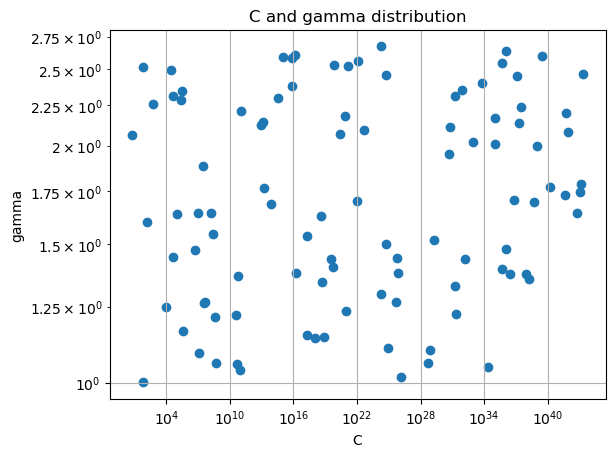

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 参数设置
num_crows = 100
num_dimensions = 2  # C和gamma两个参数
crows = np.zeros((num_crows, num_dimensions))
for i in range(num_crows):
    crows[i][0] = np.exp(np.random.uniform(1, 100))
    crows[i][1] = np.exp(np.random.uniform(0.001, 1))
    
# 绘制点的分布情况
plt.scatter(crows[:, 0], crows[:, 1])
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('C and gamma distribution')
plt.xscale('log')  # 使用对数刻度表示x轴
plt.yscale('log')  # 使用对数刻度表示y轴
plt.grid(True)  # 显示网格
plt.show()

[2.0, 0.6180339887498949]


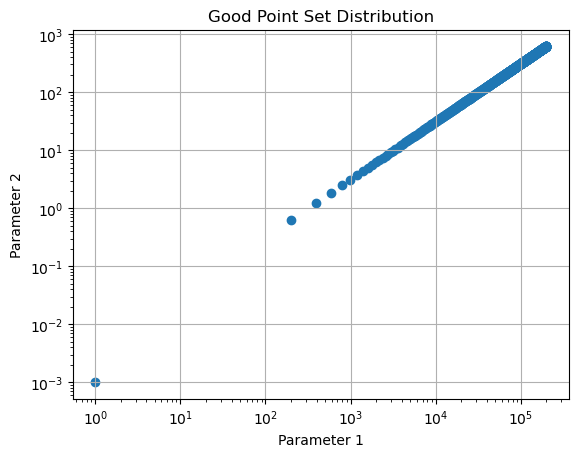

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_good_point_set(m, n, a, b):
    """
    生成佳点集并映射到搜索空间中。

    参数:
    m (int): 种群大小
    n (int): 维度
    a (list or array-like): 每个维度的下限
    b (list or array-like): 每个维度的上限

    返回:
    good_points (numpy.ndarray): 映射到搜索空间中的佳点集
    """
    # 计算佳点集的参数
    s = n  # 维度
    p = 2 * s + 1  # 满足(p-3)/2 >= s的最小素数
    r = [2 * np.cos(2 * np.pi * j / p) for j in range(s)]

    print(r)
    # 生成佳点集
    good_points = []
    for i in range(m):
        point = [(i * r[j % s]) for j in range(n)]  # 使用迭代次数i来改变点的位置
        good_points.append(point)

    # 映射到搜索空间中
    good_points = np.array(good_points)
    a = np.array(a)
    b = np.array(b)
    good_points = a + (b - a) * good_points

    return good_points

# 示例用法
m = 1000  # 种群大小
n = 2   # 维度
a = [1, 0.001]  # 每个维度的下限
b = [100, 1]  # 每个维度的上限

good_points = generate_good_point_set(m, n, a, b)

# 绘制点的分布情况
plt.scatter(good_points[:, 0], good_points[:, 1])
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('Good Point Set Distribution')
plt.xscale('log')  # 使用对数刻度表示x轴
plt.yscale('log')  # 使用对数刻度表示y轴
plt.grid(True)  # 显示网格
plt.show()

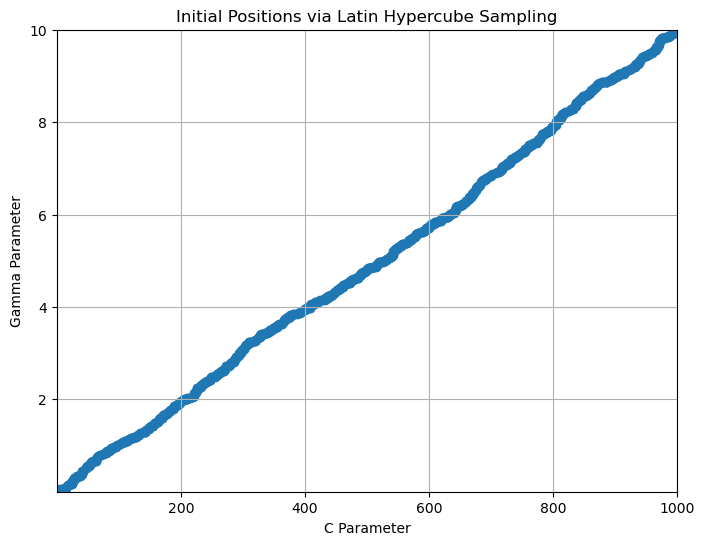

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def latin_hypercube_sampling(num_samples, num_dimensions, bounds):
    """
    拉丁超立方采样函数
    :param num_samples: 样本数量
    :param num_dimensions: 维度数量
    :param bounds: 各维度的边界列表，形式为[(min1, max1), (min2, max2), ...]
    :return: 初始化的佳点集
    """
    result = []
    for d in range(num_dimensions):
        min_val, max_val = bounds[d]
        # 创建均匀分布的随机数序列
        samples = np.random.uniform(0, 1, num_samples)
        # 对序列进行排序，保证均匀性
        sorted_samples = np.sort(samples)
        # 将[0,1]区间映射到[min_val, max_val]区间
        mapped_samples = min_val + (max_val - min_val) * sorted_samples
        result.append(mapped_samples)
    
    # 转置结果，使得每一行代表一个样本
    return np.array(result).T

# 参数设置
num_crows = 10
num_dimensions = 2
bounds = [(0.1, 1000), (0.001, 10)]  # 假设这是C和gamma的搜索空间

# 调用函数生成佳点集
initial_positions = latin_hypercube_sampling(num_crows, num_dimensions, bounds)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.scatter(initial_positions[:, 0], initial_positions[:, 1])
plt.title('Initial Positions via Latin Hypercube Sampling')
plt.xlabel('C Parameter')
plt.ylabel('Gamma Parameter')
plt.xlim(bounds[0])  # 设置x轴的范围
plt.ylim(bounds[1])  # 设置y轴的范围
plt.grid(True)
plt.show()

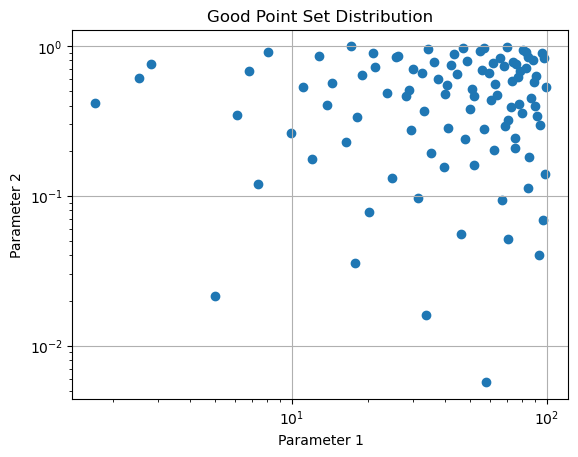

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

# 定义参数
m = 100  # 种群大小
n = 2   # 维度
a = [1, 0.001]  # 每个维度的下限
b = [100, 1]  # 每个维度的上限

# 使用 Sobol 序列生成佳点集
sampler = qmc.Sobol(d=n, scramble=True)
sample = sampler.random(m)
a = np.array(a)
b = np.array(b)
# 映射到搜索空间中
good_points = a + (b - a) * sample

# 绘制点的分布情况
plt.scatter(good_points[:, 0], good_points[:, 1])
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('Good Point Set Distribution')
plt.xscale('log')  # 使用对数刻度表示x轴
plt.yscale('log')  # 使用对数刻度表示y轴
plt.grid(True)  # 显示网格
plt.show()

### 二维三维的佳点集和随机值对比

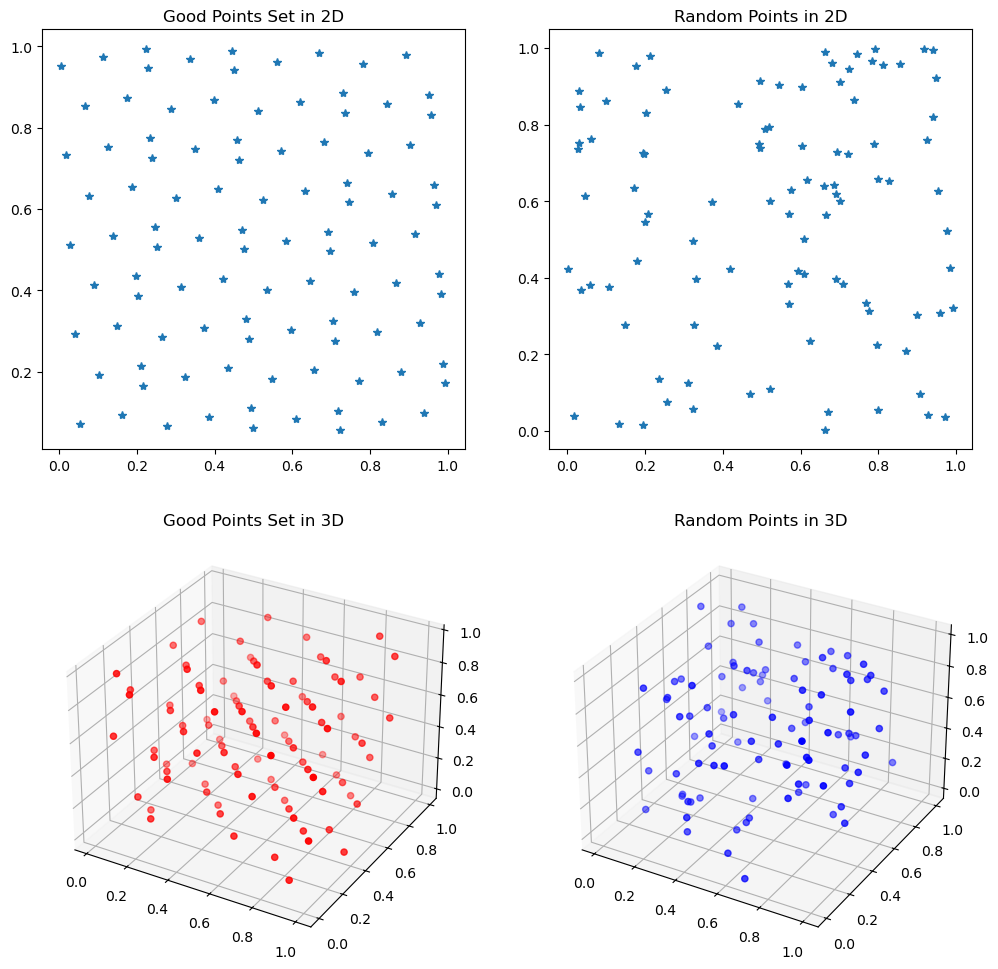

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def is_prime(n):
    """判断一个数是否为素数"""
    if n <= 1:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def init_pop(pop_size, dimension, bounds):
    """使用佳点集方法生成初始种群"""
    p = np.zeros((pop_size, dimension))
    prime_number_min = dimension * 2 + 3
    # 找到(prime_number_min-3)/2>=dimension的最小素数prime_number_min
    while not is_prime(prime_number_min):
        prime_number_min += 1

    for i in range(pop_size):
        for j in range(dimension):
            r = np.mod(2 * np.cos(2 * np.pi * (j + 1) / prime_number_min) * (i + 1), 1)
            p[i, j] = bounds[j, 0] + r * (bounds[j, 1] - bounds[j, 0])
    return p

def init_pop_rand(pop_size, dimension, bounds):
    """在定义域范围内随机生成种群"""
    p = np.random.rand(pop_size, dimension)
    for i in range(dimension):
        p[:, i] = bounds[i, 0] + p[:, i] * (bounds[i, 1] - bounds[i, 0])
    return p

def test_plot_pop():
    # 定义种群大小
    pop_size = 100
    # 定义种群的取值范围
    dimension_2 = 2
    dimension_3 = 3
    bounds_2 = np.array([[0, 1], [0, 1]])
    bounds_3 = np.array([[0, 1], [0, 1], [0, 1]])

    # 二维、三维的佳点集种群
    pop2 = init_pop(pop_size, dimension_2, bounds_2)
    pop3 = init_pop(pop_size, dimension_3, bounds_3)

    # 二维、三维随机生成的种群
    pop2_rand = init_pop_rand(pop_size, dimension_2, bounds_2)
    pop3_rand = init_pop_rand(pop_size, dimension_3, bounds_3)

    # 创建画布
    fig = plt.figure(figsize=(12, 12))

    # 画出二维下图形佳点集种群，和随机种群
    ax1 = fig.add_subplot(221)
    ax1.plot(pop2[:, 0], pop2[:, 1], '*')
    ax1.set_title('Good Points Set in 2D')

    ax2 = fig.add_subplot(222)
    ax2.plot(pop2_rand[:, 0], pop2_rand[:, 1], '*')
    ax2.set_title('Random Points in 2D')

    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter(pop3[:, 0], pop3[:, 1], pop3[:, 2], c='r', marker='o')
    ax3.set_title('Good Points Set in 3D')

    ax4 = fig.add_subplot(224, projection='3d')
    ax4.scatter(pop3_rand[:, 0], pop3_rand[:, 1], pop3_rand[:, 2], c='b', marker='o')
    ax4.set_title('Random Points in 3D')

    plt.show()

# 调用测试函数
test_plot_pop()

### 二维的C和γ佳点集生成

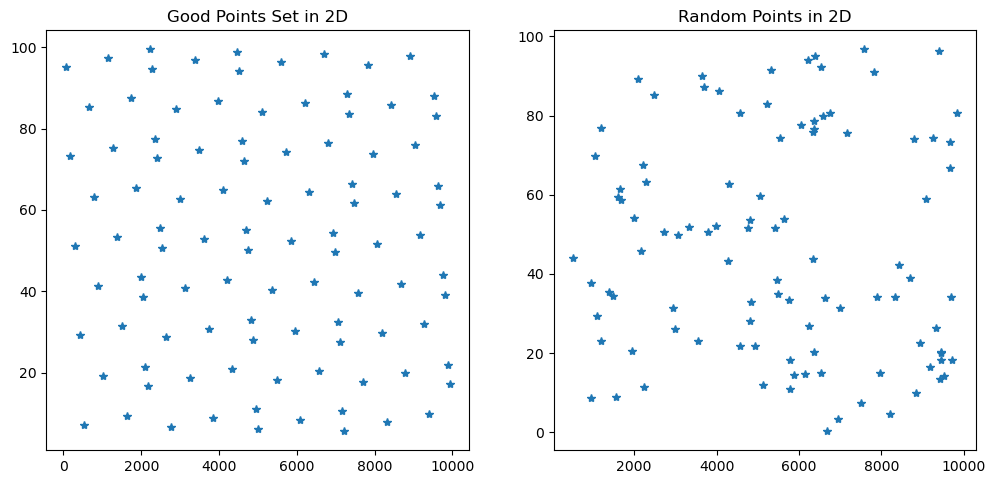

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def is_prime(n):
    """判断一个数是否为素数"""
    if n <= 1:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def init_pop(pop_size, dimension, bounds):
    """使用佳点集方法生成初始种群"""
    p = np.zeros((pop_size, dimension))
    prime_number_min = dimension * 2 + 3
    # 找到(prime_number_min-3)/2>=dimension的最小素数prime_number_min
    while not is_prime(prime_number_min):
        prime_number_min += 1

    for i in range(pop_size):
        for j in range(dimension):
            r = np.mod(2 * np.cos(2 * np.pi * (j + 1) / prime_number_min) * (i + 1), 1)
            p[i, j] = bounds[j, 0] + r * (bounds[j, 1] - bounds[j, 0])
    return p

def init_pop_rand(pop_size, dimension, bounds):
    """在定义域范围内随机生成种群"""
    p = np.random.rand(pop_size, dimension)
    for i in range(dimension):
        p[:, i] = bounds[i, 0] + p[:, i] * (bounds[i, 1] - bounds[i, 0])
    return p

def test_plot_pop():
    # 定义种群大小
    pop_size = 100
    # 定义种群的取值范围
    dimension_2 = 2
    bounds_2 = np.array([[0, 10000], [0, 100]])

    # 二维、三维的佳点集种群
    pop2 = init_pop(pop_size, dimension_2, bounds_2)

    # 二维、三维随机生成的种群
    pop2_rand = init_pop_rand(pop_size, dimension_2, bounds_2)

    # 创建画布
    fig = plt.figure(figsize=(12, 12))

    # 画出二维下图形佳点集种群，和随机种群
    ax1 = fig.add_subplot(221)
    ax1.plot(pop2[:, 0], pop2[:, 1], '*')
    ax1.set_title('Good Points Set in 2D')

    ax2 = fig.add_subplot(222)
    ax2.plot(pop2_rand[:, 0], pop2_rand[:, 1], '*')
    ax2.set_title('Random Points in 2D')

    plt.show()

# 调用测试函数
test_plot_pop()